<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Description" data-toc-modified-id="Description-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Description</a></span></li><li><span><a href="#Start-up-code" data-toc-modified-id="Start-up-code-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Start-up code</a></span></li><li><span><a href="#Comment---think-before-coding!" data-toc-modified-id="Comment---think-before-coding!-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Comment - think before coding!</a></span></li><li><span><a href="#Solution-#1" data-toc-modified-id="Solution-#1-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Solution #1</a></span></li><li><span><a href="#Solution-#2" data-toc-modified-id="Solution-#2-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Solution #2</a></span></li><li><span><a href="#Solution-#3" data-toc-modified-id="Solution-#3-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Solution #3</a></span></li><li><span><a href="#Key-concepts" data-toc-modified-id="Key-concepts-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Key concepts</a></span></li><li><span><a href="#References" data-toc-modified-id="References-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>References</a></span></li></ul></div>

# Description
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-warning">
<font color=black>

- There is a bi-directional graph with n vertices, where each vertex is labeled from `0` to `n - 1` (inclusive). 
- The edges in the graph are represented as a 2D integer array edges, where each `edges[i] = [u_i, v_i]` denotes a bi-directional edge between vertex `u_i` and vertex `v_i`. Every vertex pair is connected by at most one edge, and no vertex has an edge to itself.
- You want to determine if there is a valid path that exists from vertex source to vertex destination.
- Given edges and the integers `n`, `source`, and `destination`, return `True` if there is a valid path from source to destination, or `False` otherwise.
 
</font>
</div>

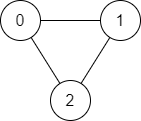

<div class="alert alert-warning">
<font color=black>

- Input: n = 3
- edges = [[0,1],[1,2],[2,0]]
- source = 0
- destination = 2
- Output: true
- Explanation: There are two paths from vertex 0 to vertex 2:

```
- 0 → 1 → 2
- 0 → 2
```
</font>
</div>

<div class="alert alert-warning">
<font color=black>

- Input: n = 6
- edges = [[0,1],[0,2],[3,5],[5,4],[4,3]]
- source = 0
- destination = 5
- Output: false
- Explanation: There is no path from vertex 0 to vertex 5.

</font>
</div>

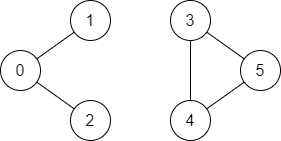

# Start-up code
<hr style = "border:2px solid black" ></hr>

In [16]:
from typing import List


def validPath(n: int, edges: List[List[int]], source: int, destination: int) -> bool:

    return None

print(validPath(5, [[0, 4]], 0, 4), "Expected=True")
print(validPath(3, [[0, 1], [1, 2], [2, 0]], 0, 2), "Expected=True")
print(validPath(6, [[0, 1], [0, 2], [3, 5], [
      5, 4], [4, 3]], 0, 5), "Expected=False")

None Expected=True
None Expected=False


# Comment - think before coding!
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-info">
<font color=black>

- There are `n` vertices, where each vertex is labeled from `0` to `n - 1` (inclusive). However, there is no guarantee that there is not gap between `0` and `n-1`.
- A valid path here means that we go from source to destination by a any step, so assuming the `step=1`, would not be correct.
    
</font>
</div>

# Solution #1
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-info">
<font color=black>

- **Stack** was last-in first-out.
- **Queue** is the opposite of stack, meaning first-in first-out.
- List are not **efficiently** used as a queue, because all the other elements have to be shifted by one.
- To implement a queue use `collections.deque` which was designed to have fast append and pops from both ends.
- **HOWEVER this will exceed the leetcod time limit!**.
    
</font>
</div>

In [138]:
from typing import List
from collections import deque


def validPath(n: int, edges: List[List[int]], source: int, destination: int) -> bool:

    # Create a dictionary to store the adjacency list for each vertex
    adj_list = {}
    for u, v in edges:
        if u in adj_list:
            adj_list[u].append(v)
        else:
            adj_list[u] = [v]
        if v in adj_list:
            adj_list[v].append(u)
        else:
            adj_list[v] = [u]

    # Initialize a queue and a set to store visited vertices
    queue = deque([source])

    visited = set()

    # Perform BFS
    while queue:
        vertex = queue.popleft()

        if vertex == destination:
            return True

        # Add to visited set
        visited.add(vertex)

        for neighbor in adj_list[vertex]:
            if neighbor not in visited:
                queue.append(neighbor)

    # Return false if the destination is not reached
    return False

In [139]:
print(validPath(10, [[4, 3], [1, 4], [4, 8], [1, 7], [6, 4], [
      4, 2], [7, 4], [4, 0], [0, 9], [5, 4]], 5, 9), "Expected=True")

True Expected=True


In [140]:
print(validPath(5, [[0, 4]], 0, 4), "Expected=True")

True Expected=True


In [141]:
print(validPath(3, [[0, 1], [1, 2], [2, 0]], 0, 2), "Expected=True")

True Expected=True


In [142]:
print(validPath(6, [[0, 1], [0, 2], [3, 5], [
      5, 4], [4, 3]], 0, 5), "Expected=False")

False Expected=False


# Solution #2
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-info">
<font color=black>

- This solution does not use `deque` and although it works is less efficient than solution #1.
- What is really conveninet is how `popleft()` efficiently remove the fist element of the queue and how it return the popped element.
- **HOWEVER this will exceed the leetcod time limit!**.
    
</font>
</div>

In [128]:
from typing import List
from collections import deque


def validPath(n: int, edges: List[List[int]], source: int, destination: int) -> bool:

    # Create a dictionary to store the adjacency list for each vertex
    adj_list = {}
    for u, v in edges:
        if u in adj_list:
            adj_list[u].append(v)
        else:
            adj_list[u] = [v]
        if v in adj_list:
            adj_list[v].append(u)
        else:
            adj_list[v] = [u]

    # Initialize a queue and a set to store visited vertices
    #queue = deque([source])
    queue = [source]

    visited = set()

    # Perform BFS
    while queue:

        # Get the first element of the list
        vertex = queue[0]
        # Resave the list but do not consider the fist element
        queue = queue[1:]

        if vertex == destination:
            return True

        # Add to visited set
        visited.add(vertex)

        for neighbor in adj_list[vertex]:
            if neighbor not in visited:
                # Adding to the list
                queue.append(neighbor)

    # Return false if the destination is not reached
    return False

In [129]:
print(validPath(10, [[4, 3], [1, 4], [4, 8], [1, 7], [6, 4], [
      4, 2], [7, 4], [4, 0], [0, 9], [5, 4]], 5, 9), "Expected=True")


True Expected=True


# Solution #3
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-info">
<font color=black>

- **Depth-first search (DFS)** is an algorithm for traversing or searching tree or graph data structures. The algorithm starts at the root node (selecting some arbitrary node as the root node in the case of a graph) and explores as far as possible along each branch before backtracking. 

- So the basic idea is to start from the root or any arbitrary node and mark the node and move to the adjacent unmarked node and continue this loop until there is no unmarked adjacent node. Then backtrack and check for other unmarked nodes and traverse them. Finally, print the nodes in the path.

- This implementation has passed the LeetCode autograder.

</font>
</div>

In [145]:
from typing import List
from collections import deque
from collections import defaultdict

def validPath(n: int, edges: List[List[int]], source: int, destination: int) -> bool:
    
    tree = defaultdict(set)
    for u,v in edges:
        tree[u].add(v)
        tree[v].add(u)
    
    # Define a set, automatically delete duplicated
    seen = {source}
    # Define a stack - last in first out
    stack = [source]
    
    while stack:
        v = stack.pop()
        if v == destination:
            return True
        for u in tree[v]:
            if u not in seen:
                seen.add(u)
                stack.append(u)
    return False

In [146]:
print(validPath(10, [[4, 3], [1, 4], [4, 8], [1, 7], [6, 4], [
      4, 2], [7, 4], [4, 0], [0, 9], [5, 4]], 5, 9), "Expected=True")

True Expected=True


# Key concepts
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-danger">
<font color=black>

- Default dictionary
- Queue and stack
- DFS = Depth-First Search 
    
</font>
</div>

# References
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-warning">
<font color=black>

- https://leetcode.com
- [Depth First Search or DFS for a Graph](https://www.geeksforgeeks.org/depth-first-search-or-dfs-for-a-graph/)
    
</font>
</div>